<a href="https://colab.research.google.com/github/Jushef/Proyectos-ML-DL/blob/main/Supervised%20Learning/Classification/Classification_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification-Master Template**
¿Cómo trabajar a través de un problema de aprendizaje automático basado en la clasificación o la regresión? En este proyecto lo veremos a través de un problema de modelado predictivo de clasificación en Python, incluyendo cada paso del proceso de aprendizaje automático aplicado. Sin embargo, este cuaderno es aplicable también a un caso de estudio basado en la regresión. Los modelos, la búsqueda en la red y las métricas de evaluación tendrán que cambiar para el caso de estudio basado en la regresión.

## **Contenido**

* [1. Introducción](#0)
* [2. Introducción - Carga de bibliotecas y conjunto de datos](#1)
    * [2.1. Cargar bibliotecas](#1.1)    
    * [2.2. Cargar el conjunto de datos](#1.2)
* [3. Análisis exploratorio de datos](#2)
    * [3.1. Estadísticas descriptivas](#2.1)    
    * [3.2. Visualización de datos](#2.2)
* [4. Preparación de los datos](#3)
    * [4.1. Limpieza de datos](#3.1)
    * [4.2.Tratamiento de datos categóricos](#3.2)
    * [4.3.Selección de características](#3.3)
    * [4.3.Transformación de datos](#3.4) 
        * [4.3.1 Reescalado](#3.4.1)
        * [4.3.2 Normalización](#3.4.2)
        * [4.3.3 Normalización](#3.4.3)    
* [5.Evaluar algoritmos y modelos](#4)        
    * [5.1. División de entrenamiento/prueba](#4.1)
    * [5.2. Opciones de prueba y métricas de evaluación](#4.2)
    * [5.3. Comparación de modelos y algoritmos](#4.3)
        * [5.3.1 Modelos de clasificación comunes](#4.3.1)
        * [5.3.2 Modelos de conjunto](#4.3.2)
        * [5.3.3 Modelos de aprendizaje profundo](#4.3.3)    
* [6. Ajuste del modelo y búsqueda de la cuadrícula](#5)  
* [7. Finalizar el modelo](#6)  
    * [7.1. Resultados en el conjunto de datos de prueba](#6.1)
    * [7.1. Intuición de variables/Selección de características](#6.2) 
    * [7.3. Guardar el modelo para su uso posterior](#6.3)
   

<a id='0'></a>
# 1. Definición del problema

Nuestro objetivo en este cuaderno jupyter es bajo lo siguiente

* Cómo trabajar con un problema de modelado predictivo de principio a fin. Este cuaderno es aplicable tanto a problemas de regresión como de clasificación.

* Cómo utilizar las transformaciones de datos para mejorar el rendimiento del modelo.
* Cómo utilizar el ajuste del algoritmo para mejorar el rendimiento del modelo.
* Cómo utilizar los métodos de conjunto y el ajuste de los métodos de conjunto para mejorar el rendimiento del modelo.
* Cómo utilizar los métodos de aprendizaje profundo.

Los datos son un subconjunto de los datos alemanes por defecto (https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) con los siguientes atributos. Edad, sexo, empleo, vivienda, cuentas de ahorro, cuenta corriente, importe de crédito, duración, finalidad.

* Se han implementado y comprobado los siguientes modelos:

  * Regresión logística
  * Análisis discriminante lineal
  * K Vecinos más cercanos
  * Árbol de decisión (CART)
  * Máquina de vectores de apoyo
  * Ada Boost
  * Método Gradient Boosting
  * Bosque aleatorio
  * Árboles adicionales
  * Red neuronal - superficial
  * Red neuronal profunda

<a id='1'></a>
# 2. Cómo empezar- Cargar los datos y los paquetes de python

<a id='1.1'></a>
## 2.1. Carga de los paquetes de python

In [1]:
# Carga de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Bibliotecas para modelos de aprendizaje profundo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

# Bibliotecas para guardar el modelo
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Carga de los datos

In [2]:
# cargar el conjunto de datos
dataset = pd.read_csv('/content/german_credit_data.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# 3. Análisis exploratorio de datos

<a id='2.1'></a>
## 3.1. Estadísticas descriptivas

In [4]:
# shape
dataset.shape

(1000, 10)

In [8]:
# consultar los datos
set_option('display.width', 100)
dataset.tail()

,Age,Sex,Job,Housing,SavingAccounts,CheckingAccount,CreditAmount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

Age                 int64
Sex                object
Job                 int64
Housing            object
SavingAccounts     object
CheckingAccount    object
CreditAmount        int64
Duration            int64
Purpose            object
Risk               object
dtype: object

In [6]:
# describir los datos
set_option('precision', 3)
dataset.describe()

,Age,Job,CreditAmount,Duration
count,1000.000,1000.000,1000.000,1000.000
mean,35.546,1.904,3271.258,20.903
std,11.375,0.654,2822.737,12.059
min,19.000,0.000,250.000,4.000
25%,27.000,2.000,1365.500,12.000
50%,33.000,2.000,2319.500,18.000
75%,42.000,2.000,3972.250,24.000
max,75.000,3.000,18424.000,72.000


<a id='2.2'></a>
## 3.2. Visualización de datos

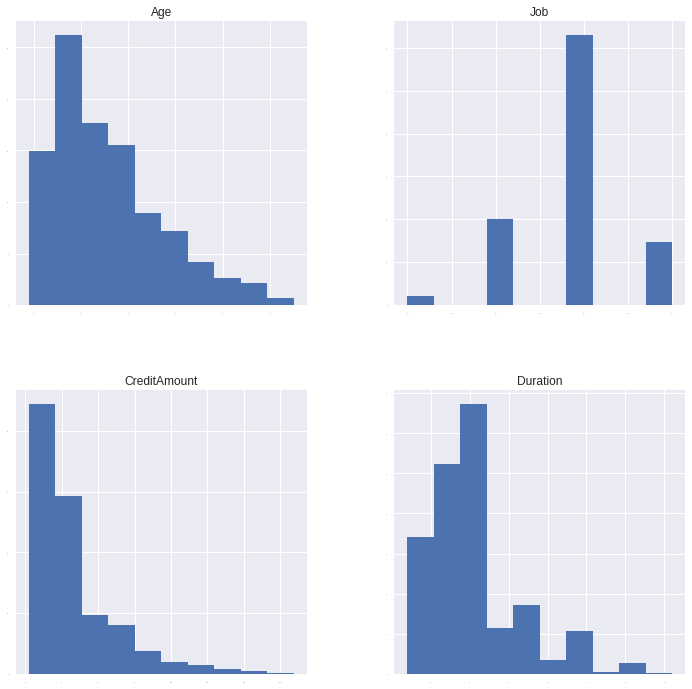

In [7]:
# histogramas

rcParams['figure.figsize'] = (12,8)
plt.style.use('seaborn')

dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

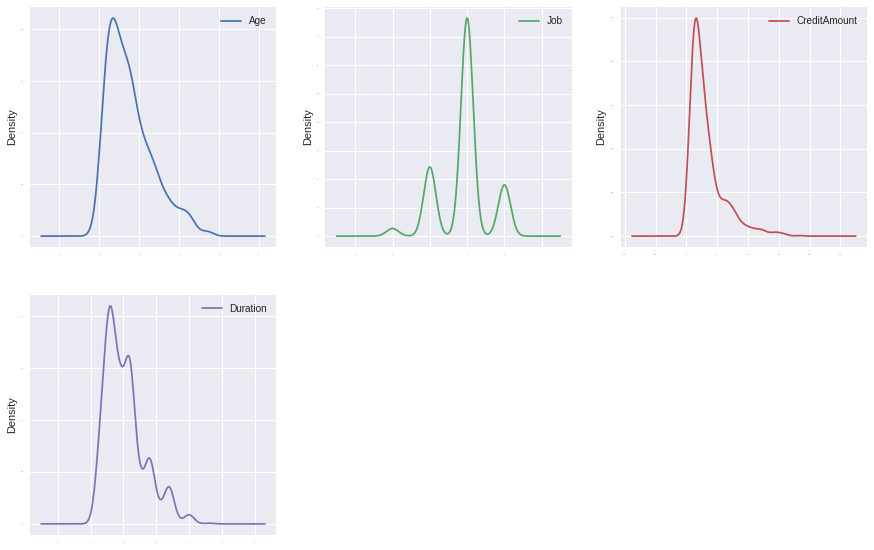

In [10]:
# densidad
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

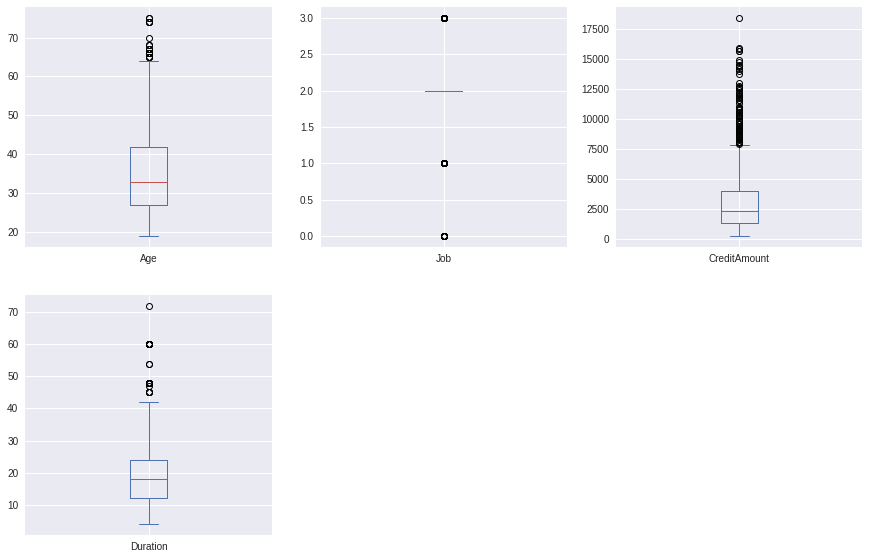

In [11]:
# Plots de cajas y bigotes
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
plt.show()

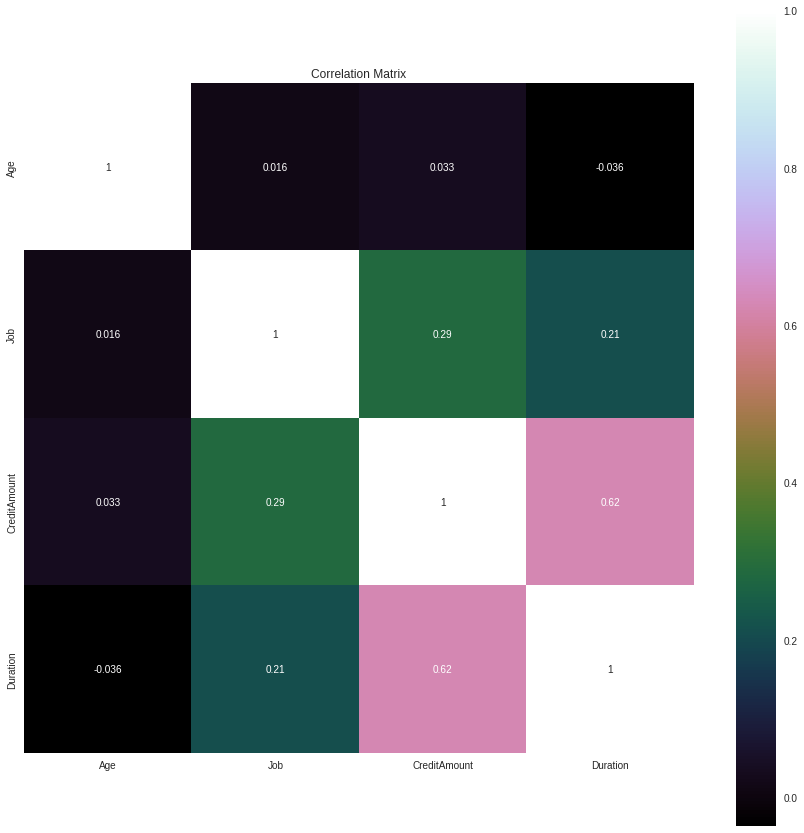

In [9]:
# correlación
plt.figure(figsize=(15,15))
correlation = dataset.corr()
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

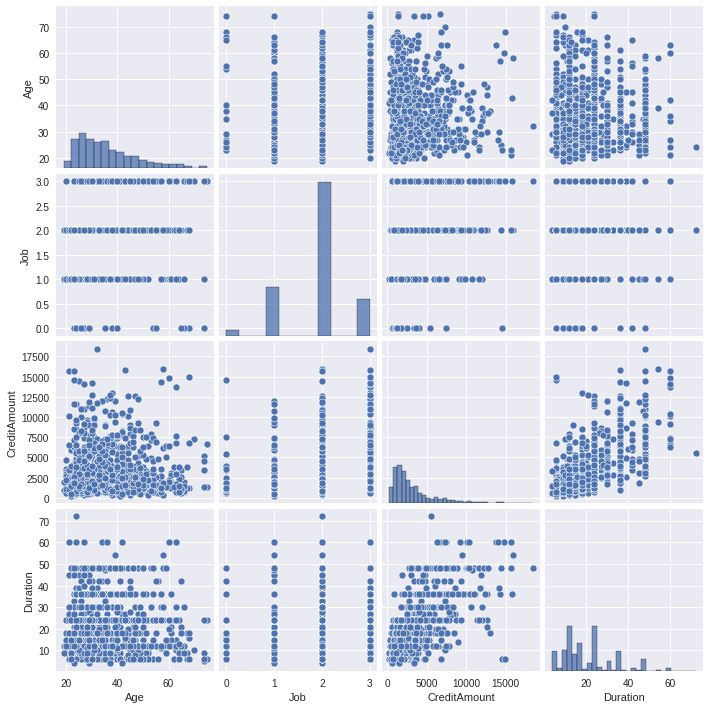

In [12]:
# Matriz de dispersión

plt.figure(figsize=(15,15))
sns.pairplot(dataset)
plt.show()


<a id='3'></a>
# 4. Preparación de los datos

<a id='3.1'></a>
## 4.1. Limpieza de datos

In [13]:
# Comprobación de cualquier valor nulo y eliminación de los valores nulos''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [14]:
dataset.isna().sum()

Age                  0
Sex                  0
Job                  0
Housing              0
SavingAccounts     183
CheckingAccount    394
CreditAmount         0
Duration             0
Purpose              0
Risk                 0
dtype: int64

* Dado que hay valores nulos, se elimina la raíz que contiene los valores nulos.

In [15]:
# Eliminar las filas que contengan NA
dataset = dataset.dropna(axis=0)

<a id='3.2'></a>
## 4.2. Manejo de datos categóricos

In [16]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["Sex_Code"] = lb_make.fit_transform(dataset["Sex"])
dataset["Housing_Code"] = lb_make.fit_transform(dataset["Housing"])
dataset["SavingAccount_Code"] = lb_make.fit_transform(dataset["SavingAccounts"].fillna('0'))
dataset["CheckingAccount_Code"] = lb_make.fit_transform(dataset["CheckingAccount"].fillna('0'))
dataset["Purpose_Code"] = lb_make.fit_transform(dataset["Purpose"])
dataset["Risk_Code"] = lb_make.fit_transform(dataset["Risk"])
dataset[["Sex", "Sex_Code","Housing","Housing_Code","Risk_Code","Risk"]].head(10)

,Sex,Sex_Code,Housing,Housing_Code,Risk_Code,Risk
1,female,0,own,1,0,bad
3,male,1,free,0,1,good
4,male,1,free,0,0,bad
7,male,1,rent,2,1,good
9,male,1,own,1,0,bad
10,female,0,rent,2,0,bad
11,female,0,rent,2,0,bad
12,female,0,own,1,1,good
13,male,1,own,1,0,bad
14,female,0,rent,2,1,good


In [17]:
# dejar de lado las viejas características
dataset.drop(['Sex','Housing','SavingAccounts','CheckingAccount','Purpose','Risk'],axis=1,inplace=True)

In [ ]:
dataset.head()

,Age,Job,CreditAmount,Duration,Sex_Code,Housing_Code,SavingAccount_Code,CheckingAccount_Code,Purpose_Code,Risk_Code
1,22,2,5951,48,0,1,0,1,5,0
3,45,2,7882,42,1,0,0,0,4,1
4,53,2,4870,24,1,0,0,0,1,0
7,35,3,6948,36,1,2,0,1,1,1
9,28,3,5234,30,1,1,0,1,1,0


<a id='3.3'></a>
## 4.3. Selección de características

La biblioteca scikit-learn proporciona la clase SelectKBest que puede ser utilizada con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.
El ejemplo siguiente utiliza la prueba estadística chi-cuadrado (chi²) para características no negativas para seleccionar 10 de las mejores características del conjunto de datos.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
bestfeatures

SelectKBest(k=5, score_func=<function chi2 at 0x7f62b5797440>)

In [20]:
Y= dataset["Risk_Code"]
X = dataset.loc[:, dataset.columns != 'Risk_Code']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concatenar dos marcos de datos para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # nombrar las columnas del marco de datos
print(featureScores.nlargest(10,'Score'))  # imprimir 10 mejores características

                  Specs      Score
2          CreditAmount  45853.601
3              Duration    327.508
6    SavingAccount_Code     14.395
7  CheckingAccount_Code      7.096
0                   Age      6.534
8          Purpose_Code      1.902
4              Sex_Code      0.671
1                   Job      0.318
5          Housing_Code      0.007


* Como puede verse en las cifras anteriores, el importe del crédito es la característica más importante, seguida de la duración.

<a id='3.4'></a>
## 4.4. Transformación de datos

<a id='3.4.1'></a>
### 4.4.1. Reescalado de datos

Cuando los datos se componen de atributos con escalas diferentes, muchos algoritmos de aprendizaje automático
pueden beneficiarse de reescalar los atributos para que todos tengan la misma escala. A menudo esto se denomina
normalización y los atributos se reescalan a menudo en un rango entre 0 y 1.

In [21]:
from sklearn.preprocessing import MinMaxScaler

X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))
# resumir los datos transformados
rescaledX.head()

,0,1,2,3,4,5,6,7,8
0,0.054,0.667,0.313,0.636,0.0,0.5,0.0,0.5,0.714
1,0.464,0.667,0.419,0.545,1.0,0.0,0.0,0.0,0.571
2,0.607,0.667,0.253,0.273,1.0,0.0,0.0,0.0,0.143
3,0.286,1.000,0.368,0.455,1.0,1.0,0.0,0.5,0.143
4,0.161,1.000,0.273,0.364,1.0,0.5,0.0,0.5,0.143


<a id='3.4.2'></a>
### 4.4.2. Estandarizar los datos

La estandarización es una técnica útil para transformar atributos con una distribución gaussiana y
diferentes medias y desviaciones estándar a una distribución gaussiana estándar con una media de
0 y una desviación estándar de 1.

In [22]:
from sklearn.preprocessing import StandardScaler

X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))

# resumir los datos transformados
StandardisedX.head()

,0,1,2,3,4,5,6,7,8
0,-1.094,0.183,0.913,2.139,-1.452,-0.145,-0.451,0.557,1.063
1,0.859,0.183,1.573,1.658,0.689,-1.900,-0.451,-0.958,0.561
2,1.538,0.183,0.544,0.214,0.689,-1.900,-0.451,-0.958,-0.944
3,0.009,1.648,1.254,1.176,0.689,1.611,-0.451,0.557,-0.944
4,-0.585,1.648,0.668,0.695,0.689,-0.145,-0.451,0.557,-0.944


<a id='3.4.3'></a>
### 4.4.1. Normalizar datos

Normalizar en scikit-learn se refiere a reescalar cada observación (fila) para que tenga una longitud de 1 (llamada
una norma unitaria o un vector con la longitud de 1 en álgebra lineal).

In [23]:
from sklearn.preprocessing import Normalizer

X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = Normalizer().fit(X)
NormalizedX = pd.DataFrame(scaler.fit_transform(X))

# resumir los datos transformados
NormalizedX.head()

,0,1,2,3,4,5,6,7,8
0,0.004,3.361e-04,1.0,0.008,0.000e+00,1.680e-04,0.0,1.680e-04,8.402e-04
1,0.006,2.537e-04,1.0,0.005,1.269e-04,0.000e+00,0.0,0.000e+00,5.075e-04
2,0.011,4.106e-04,1.0,0.005,2.053e-04,0.000e+00,0.0,0.000e+00,2.053e-04
3,0.005,4.318e-04,1.0,0.005,1.439e-04,2.878e-04,0.0,1.439e-04,1.439e-04
4,0.005,5.732e-04,1.0,0.006,1.911e-04,1.911e-04,0.0,1.911e-04,1.911e-04


<a id='4'></a>
# 5. Evaluar algoritmos y modelos

<a id='4.1'></a>
## 5.1. Train Test Split

In [24]:
# dividir el conjunto de datos de validación para el final
Y= dataset["Risk_Code"]
X = dataset.loc[:, dataset.columns != 'Risk_Code']

scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))

validation_size = 0.2
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<a id='4.2'></a>
## 5.2. Opciones de prueba y métricas de evaluación

In [25]:
# opciones de prueba para la clasificación
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

<a id='4.3'></a>
## 5.3. Comparar modelos y algoritmos

<a id='4.3.1'></a>
### 5.3.1. Modelos comunes

In [26]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Neural Network
models.append(('NN', MLPClassifier()))

<a id='4.3.2'></a>
### 5.3.2. Ensemble Models

In [27]:
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [28]:
# Escribir el clasificador de aprendizaje profundo en caso de que el indicador de aprendizaje profundo se establezca como verdadero
# Poner el siguiente Flag a 0 si el Flag de Modelos de Aprendizaje Profundo tiene que ser habilitado
EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1 :   
    # Función para crear el modelo, necesaria para KerasClassifier
    def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # crear un modelo
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(2, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        # Compilar el modelo
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model    
    models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)))

In [29]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'{name} : {round(cv_results.mean(), 3)}, {round(cv_results.std(), 3)}'
    print(msg)

LR : 0.611, 0.056
LDA : 0.607, 0.067
KNN : 0.547, 0.058
CART : 0.537, 0.088
NB : 0.614, 0.068
SVM : 0.602, 0.059
NN : 0.6, 0.093
AB : 0.621, 0.094
GBM : 0.614, 0.043
RF : 0.616, 0.079
ET : 0.607, 0.101
Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 286.8759 - accuracy: 0.5733
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 207.8600 - accuracy: 0.5733
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 132.9455 - accuracy: 0.5733
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 55.4554 - accuracy: 0.5733
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 2.0004 - accuracy: 0.4987
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.4267
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.4267
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.4267
Epoch 9

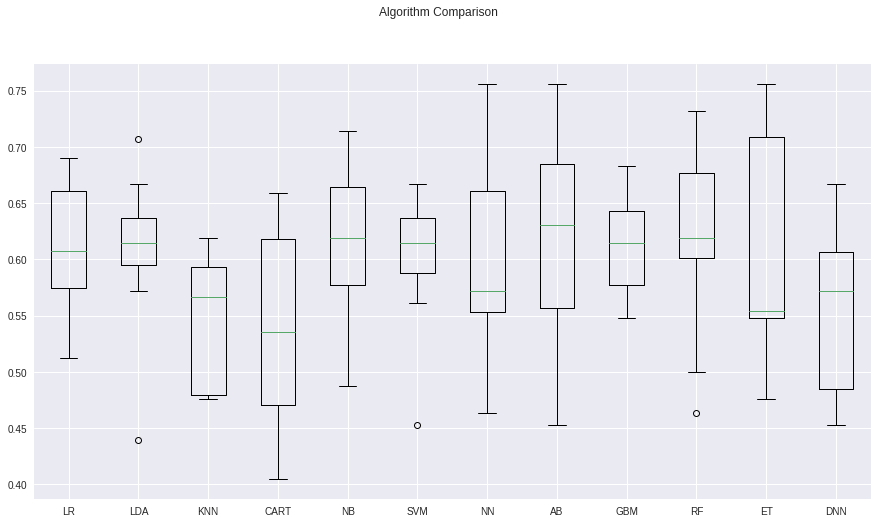

In [30]:
# comparar algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

<a id='5'></a>
# 6. Ajuste del modelo y búsqueda en la cuadrícula

In [31]:
# 1. Grid search : Logistic Regression Algorithm 
'''
penalty : str, 'l1', 'l2', 'elasticnet' o 'none', opcional (por defecto='l2')

C : float, opcional (por defecto=1.0)
Inverso de la fuerza de regularización; debe ser un float positivo. Los valores más pequeños especifican una regularización más fuerte.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
C= np.logspace(-3,3,7)
penalty = ["l1","l2"]# l1 lasso l2 ridge
param_grid = dict(C=C,penalty=penalty )
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.623403 using {'C': 0.01, 'penalty': 'l2'}
#8 nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
#7 0.570790 (0.051268) with: {'C': 0.001, 'penalty': 'l2'}
#9 nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
#1 0.623403 (0.057929) with: {'C': 0.01, 'penalty': 'l2'}
#10 nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
#2 0.606620 (0.074149) with: {'C': 0.1, 'penalty': 'l2'}
#11 nan (nan) with: {'C': 1.0, 'penalty': 'l1'}
#3 0.604181 (0.071294) with: {'C': 1.0, 'penalty': 'l2'}
#12 nan (nan) with: {'C': 10.0, 'penalty': 'l1'}
#3 0.604181 (0.071294) with: {'C': 10.0, 'penalty': 'l2'}
#13 nan (nan) with: {'C': 100.0, 'penalty': 'l1'}
#3 0.604181 (0.071294) with: {'C': 100.0, 'penalty': 'l2'}
#14 nan (nan) with: {'C': 1000.0, 'penalty': 'l1'}
#3 0.604181 (0.071294) with: {'C': 1000.0, 'penalty': 'l2'}


In [32]:
# Grid Search : LDA Algorithm 
'''
n_components : int, opcional (por defecto=Ninguna)
Número de componentes para la reducción de la dimensionalidad. Si es Ninguno, se establecerá en min(n_clases - 1, n_características).
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
components  = [1,3,5,7,9,11,13,15,17,19,600]
param_grid = dict(n_components=components)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.606562 using {'n_components': 1}
#1 0.606562 (0.067055) with: {'n_components': 1}
#2 nan (nan) with: {'n_components': 3}
#3 nan (nan) with: {'n_components': 5}
#4 nan (nan) with: {'n_components': 7}
#5 nan (nan) with: {'n_components': 9}
#6 nan (nan) with: {'n_components': 11}
#7 nan (nan) with: {'n_components': 13}
#8 nan (nan) with: {'n_components': 15}
#9 nan (nan) with: {'n_components': 17}
#10 nan (nan) with: {'n_components': 19}
#11 nan (nan) with: {'n_components': 600}


In [33]:
# Grid Search KNN algorithm tuning
'''
n_neighbors : int, opcional (por defecto = 5)
    Número de vecinos a utilizar por defecto para las consultas kneighbors.

weights : str o callable, opcional (por defecto = 'uniform')
    función de peso utilizada en la predicción. Valores posibles: 'uniform', 'distance'

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=neighbors, weights = weights )
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.632927 using {'n_neighbors': 19, 'weights': 'distance'}
#21 0.568351 (0.079508) with: {'n_neighbors': 1, 'weights': 'uniform'}
#21 0.568351 (0.079508) with: {'n_neighbors': 1, 'weights': 'distance'}
#13 0.594541 (0.100938) with: {'n_neighbors': 3, 'weights': 'uniform'}
#11 0.594599 (0.092445) with: {'n_neighbors': 3, 'weights': 'distance'}
#4 0.611150 (0.072539) with: {'n_neighbors': 5, 'weights': 'uniform'}
#7 0.606214 (0.085169) with: {'n_neighbors': 5, 'weights': 'distance'}
#11 0.594599 (0.068041) with: {'n_neighbors': 7, 'weights': 'uniform'}
#4 0.611150 (0.072924) with: {'n_neighbors': 7, 'weights': 'distance'}
#20 0.570674 (0.073861) with: {'n_neighbors': 9, 'weights': 'uniform'}
#17 0.587340 (0.069366) with: {'n_neighbors': 9, 'weights': 'distance'}
#16 0.589895 (0.071692) with: {'n_neighbors': 11, 'weights': 'uniform'}
#10 0.601858 (0.080843) with: {'n_neighbors': 11, 'weights': 'distance'}
#19 0.585017 (0.078795) with: {'n_neighbors': 13, 'weights': 'uniform'}
#14 0.5

In [34]:
# Grid Search : CART Algorithm 
'''
max_depth : int o None, opcional (por defecto=None)
    La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras 
    o hasta que todas las hojas contengan menos muestras que min_samples_split.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
max_depth = np.arange(2, 30)
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.614111 using {'max_depth': 9}
#8 0.599419 (0.047852) with: {'max_depth': 2}
#5 0.606736 (0.053753) with: {'max_depth': 3}
#9 0.592218 (0.050024) with: {'max_depth': 4}
#2 0.613879 (0.043501) with: {'max_depth': 5}
#6 0.604355 (0.051254) with: {'max_depth': 6}
#3 0.611672 (0.064612) with: {'max_depth': 7}
#4 0.609292 (0.057156) with: {'max_depth': 8}
#1 0.614111 (0.079224) with: {'max_depth': 9}
#7 0.602149 (0.056074) with: {'max_depth': 10}
#13 0.578165 (0.047064) with: {'max_depth': 11}
#11 0.582927 (0.048527) with: {'max_depth': 12}
#12 0.580430 (0.052941) with: {'max_depth': 13}
#15 0.575494 (0.050413) with: {'max_depth': 14}
#14 0.575552 (0.059743) with: {'max_depth': 15}
#17 0.573171 (0.075778) with: {'max_depth': 16}
#19 0.570790 (0.085329) with: {'max_depth': 17}
#10 0.587573 (0.077459) with: {'max_depth': 18}
#18 0.570906 (0.075977) with: {'max_depth': 19}
#26 0.556504 (0.066464) with: {'max_depth': 20}
#27 0.554239 (0.062196) with: {'max_depth': 21}
#21 0.566028 (0.071

In [36]:
# Grid Search: SVM algorithm tuning
'''
C : float, opcional (por defecto=1,0)
Parámetro de penalización C del término de error.

kernel : str, opcional (por defecto='rbf')
Especifica el tipo de núcleo que se utilizará en el algoritmo. 
Debe ser uno de los siguientes: 'lineal', 'poly', 'rbf', 'sigmoide', 'precomputed' o un callable. 
Los parámetros de SVM son C y kernel. 
Pruebe un número de núcleos con varios valores de C con menos sesgo y más sesgo (menor y mayor que 1,0 respectivamente
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5]
kernel_values = ['linear', 'poly', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.649535 using {'C': 0.7, 'kernel': 'rbf'}
#8 0.616376 (0.071503) with: {'C': 0.1, 'kernel': 'linear'}
#23 0.592218 (0.053105) with: {'C': 0.1, 'kernel': 'poly'}
#24 0.570790 (0.051268) with: {'C': 0.1, 'kernel': 'rbf'}
#18 0.601974 (0.065673) with: {'C': 0.3, 'kernel': 'linear'}
#19 0.601800 (0.066896) with: {'C': 0.3, 'kernel': 'poly'}
#7 0.625552 (0.089579) with: {'C': 0.3, 'kernel': 'rbf'}
#11 0.604413 (0.069859) with: {'C': 0.5, 'kernel': 'linear'}
#22 0.601510 (0.087348) with: {'C': 0.5, 'kernel': 'poly'}
#6 0.637631 (0.084031) with: {'C': 0.5, 'kernel': 'rbf'}
#11 0.604413 (0.069859) with: {'C': 0.7, 'kernel': 'linear'}
#10 0.606330 (0.089217) with: {'C': 0.7, 'kernel': 'poly'}
#1 0.649535 (0.090117) with: {'C': 0.7, 'kernel': 'rbf'}
#11 0.604413 (0.069859) with: {'C': 0.9, 'kernel': 'linear'}
#9 0.613531 (0.085245) with: {'C': 0.9, 'kernel': 'poly'}
#5 0.640070 (0.088256) with: {'C': 0.9, 'kernel': 'rbf'}
#11 0.604413 (0.069859) with: {'C': 1.0, 'kernel': 'linear'}
#21 0.

In [37]:
# Grid Search: Ada boost Algorithm Tuning 
'''
n_estimators : entero, opcional (por defecto=50)
    El número máximo de estimadores en el que se termina el proceso de refuerzo. 
    En caso de ajuste perfecto, el procedimiento de aprendizaje se detiene antes.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [10, 30, 50, 70, 100, 120]
param_grid = dict(n_estimators=n_estimators)
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.633333 using {'n_estimators': 30}
#2 0.621080 (0.055343) with: {'n_estimators': 10}
#1 0.633333 (0.083419) with: {'n_estimators': 30}
#2 0.621080 (0.094101) with: {'n_estimators': 50}
#4 0.604297 (0.090798) with: {'n_estimators': 70}
#5 0.589895 (0.077183) with: {'n_estimators': 100}
#6 0.589779 (0.068374) with: {'n_estimators': 120}


In [38]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (por defecto=100)
    El número de etapas de refuerzo a realizar. 
    El refuerzo de gradiente es bastante robusto al sobreajuste, por lo que un número grande suele dar lugar a un mejor rendimiento.
max_depth : entero, opcional (por defecto=3)
    profundidad máxima de los estimadores de regresión individuales. 
    La profundidad máxima limita el número de nodos en el árbol. 
    Ajuste este parámetro para obtener el mejor rendimiento; el mejor valor depende de la interacción de las variables de entrada.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,30,50,70,100,130,180]
max_depth= [3,5,6,7,8]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.640360 using {'max_depth': 3, 'n_estimators': 180}
#26 0.606678 (0.051169) with: {'max_depth': 3, 'n_estimators': 20}
#27 0.604413 (0.045123) with: {'max_depth': 3, 'n_estimators': 30}
#28 0.604239 (0.061750) with: {'max_depth': 3, 'n_estimators': 50}
#16 0.618583 (0.051722) with: {'max_depth': 3, 'n_estimators': 70}
#18 0.616318 (0.039960) with: {'max_depth': 3, 'n_estimators': 100}
#9 0.630604 (0.042816) with: {'max_depth': 3, 'n_estimators': 130}
#1 0.640360 (0.040746) with: {'max_depth': 3, 'n_estimators': 180}
#15 0.618641 (0.038060) with: {'max_depth': 5, 'n_estimators': 20}
#4 0.637979 (0.038520) with: {'max_depth': 5, 'n_estimators': 30}
#14 0.621196 (0.032402) with: {'max_depth': 5, 'n_estimators': 50}
#10 0.625842 (0.040747) with: {'max_depth': 5, 'n_estimators': 70}
#17 0.616551 (0.043246) with: {'max_depth': 5, 'n_estimators': 100}
#12 0.621429 (0.052268) with: {'max_depth': 5, 'n_estimators': 130}
#13 0.621254 (0.057663) with: {'max_depth': 5, 'n_estimators': 180}


In [39]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (por defecto=100)
    El número de etapas de refuerzo a realizar. 
    El refuerzo de gradiente es bastante robusto al sobreajuste, por lo que un número grande suele dar lugar a un mejor rendimiento.
max_depth : entero, opcional (por defecto=3)
    profundidad máxima de los estimadores de regresión individuales. 
    La profundidad máxima limita el número de nodos del árbol. 
    Ajuste este parámetro para obtener el mejor rendimiento; el mejor valor depende de la interacción de las variables de entrada    
criterion : str, opcional (por defecto="gini")
    La función para medir la calidad de una división. 
    Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,30,50,80,100]
max_depth= [5,10,15,20,25]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.649652 using {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 50}
#42 0.601626 (0.080832) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#43 0.599303 (0.085137) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}
#13 0.628049 (0.076371) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
#29 0.611266 (0.079486) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#39 0.601858 (0.069865) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
#30 0.611092 (0.070411) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#34 0.608943 (0.080835) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}
#33 0.609001 (0.054790) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
#23 0.620674 (0.083355) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#2 0.642625 (0.073948) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
#26 0.616144 (0.090213) with: {'cr

In [40]:
# Grid Search: ExtraTreesClassifier()
'''
n_estimators : int (por defecto=100)
    El número de etapas de refuerzo a realizar. 
    El refuerzo de gradiente es bastante robusto al sobreajuste, por lo que un número grande suele dar lugar a un mejor rendimiento.
max_depth : entero, opcional (por defecto=3)
    profundidad máxima de los estimadores de regresión individuales. 
    La profundidad máxima limita el número de nodos del árbol. 
    Ajuste este parámetro para obtener el mejor rendimiento; el mejor valor depende de la interacción de las variables de entrada    
criterion : str, opcional (por defecto="gini")
    La función para medir la calidad de una división. 
    Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información. 
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,30,50,80,100]
max_depth= [5,10,15,20,25]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.635134 using {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#22 0.604181 (0.074444) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#5 0.620790 (0.076955) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}
#17 0.606388 (0.077032) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
#11 0.611266 (0.074590) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#3 0.625610 (0.070192) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
#44 0.587398 (0.064507) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#20 0.604297 (0.086544) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}
#22 0.604181 (0.064761) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
#30 0.599419 (0.077508) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#42 0.589895 (0.066401) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
#40 0.592276 (0.069919) with: {'c

In [41]:
# Grid Search : NN algorithm tuning
'''
hidden_layer_sizes : tupla, longitud = n_capas - 2, por defecto (100,)
    El ith elemento representa el número de neuronas en la ith capa oculta.
Otros parámetros que se pueden ajustar
    learning_rate_init : doble, opcional, por defecto 0.001
        La tasa de aprendizaje inicial utilizada. Controla el tamaño del paso en la actualización de los pesos. Sólo se utiliza cuando solver='sgd' o 'adam'.
    max_iter : int, opcional, por defecto 200
        Número máximo de iteraciones. El solucionador itera hasta la convergencia (determinada por 'tol') o este número de iteraciones. Para los solucionadores estocásticos ('sgd', 'adam'), 
        tenga en cuenta que esto determina el número de épocas (cuántas veces se utilizará cada punto de datos), no el número de pasos de gradiente.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
hidden_layer_sizes=[(20,), (50,), (20,20), (20, 30, 20)]
learning_rate_init = [0.01, 0.1]
max_iter = [50,100]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, max_iter=max_iter)
model = MLPClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Imprimir los Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.628049 using {'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.01, 'max_iter': 50}
#6 0.608827 (0.097728) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01, 'max_iter': 50}
#13 0.592218 (0.070836) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01, 'max_iter': 100}
#12 0.596632 (0.066689) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.1, 'max_iter': 50}
#11 0.596864 (0.062930) with: {'hidden_layer_sizes': (20,), 'learning_rate_init': 0.1, 'max_iter': 100}
#5 0.611034 (0.101559) with: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 50}
#2 0.620906 (0.093201) with: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 100}
#10 0.601510 (0.080909) with: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'max_iter': 50}
#8 0.606156 (0.074607) with: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'max_iter': 100}
#1 0.628049 (0.077255) with: {'hidden_layer_sizes': (20, 20), 'learning_ra

In [42]:
# Grid Search : Deep Neural Network algorithm tuning
'''
neurons: int
    Número de patrones mostrados a la red antes de actualizar los pesos.     
batch_size: int
    Número de observaciones a leer de una vez y mantener en memoria.
epochs: int
    Número de veces que el conjunto de datos de entrenamiento se muestra a la red durante el entrenamiento.
activation:
    La función de activación controla la no linealidad de las neuronas individuales y cuándo disparar.
learn_rate :int
    controla la actualización del peso al final de cada lote
momentum : int
     momentum controla cuánto dejar que la actualización anterior influya en la actualización del peso actual
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# Hiperparámetros modificables
neurons = [5, 10, 15]
batch_size = [10, 20, 40]
epochs = [10, 50]
activation = ['softmax', 'relu' ] #'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'
learn_rate = [0.001, 0.01]
momentum = [0.4, 0.9]


param_grid = dict(neurons=neurons, activation=activation, learn_rate=learn_rate, momentum=momentum)
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Resultados de la impresión
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.635424 using {'activation': 'relu', 'learn_rate': 0.001, 'momentum': 0.9, 'neurons': 15}
#5 0.623751 (0.075263) with: {'activation': 'softmax', 'learn_rate': 0.001, 'momentum': 0.4, 'neurons': 5}
#2 0.630662 (0.079764) with: {'activation': 'softmax', 'learn_rate': 0.001, 'momentum': 0.4, 'neurons': 10}
#18 0.611150 (0.086465) with: {'activation': 'softmax', 'learn_rate': 0.001, 'momentum': 0.4, 'neurons': 15}
#8 0.620906 (0.068618) with: {'activation': 'softmax', 'learn_rate': 0.001, 'momentum': 0.9, 'neurons': 5}
#22 0.594425 (0.088302) with: {'activation': 'softmax', 'learn_rate': 0.001, 'momentum': 0.9, 'neurons': 10}
#9 0.620848 (0.099762) with: {'activation': 'softmax', 'learn_rate': 0.001, 'momentum': 0.9, 'neurons': 15}
#19 0.599419 (0.082469) with: {'activation': 'softmax', 'learn_rate': 0.01, 'momentum': 0.4, 'neurons': 5}
#4 0.628107 (0.084314) with: {'activation': 'softmax', 'learn_rate': 0.01, 'momentum': 0.4, 'neurons': 10}
#15 0.616086 (0.073194) with: {'activatio

<a id='6'></a>
# 7. Finalizar el modelo

Si se observan los detalles anteriores, la GBM podría ser digna de un estudio más profundo, pero por ahora la SVM se muestra muy prometedora como modelo estable y de baja complejidad para este problema.

Finalizar el modelo con los mejores parámetros encontrados durante el paso de ajuste.

<a id='6.1'></a>
## 7.1. Resultados en el conjunto de datos de prueba

In [44]:
# preparar el modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=0.7) # rbf es el núcleo por defecto
model.fit(X_train, Y_train)

SVC(C=0.7)

In [45]:
# estimar la precisión en el conjunto de validación
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)

print(f'Accuracy Score: {accuracy_score(Y_validation, predictions)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(Y_validation, predictions)}\n')
print(f'Classification Report: \n{classification_report(Y_validation, predictions)}\n')

Accuracy Score: 0.5619047619047619

Confusion Matrix: 
[[ 8 44]
 [ 2 51]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.15      0.26        52
           1       0.54      0.96      0.69        53

    accuracy                           0.56       105
   macro avg       0.67      0.56      0.47       105
weighted avg       0.67      0.56      0.48       105




<a id='6.2'></a>
## 7.2. Intuición de las variables/importancia de las características

Si observamos los detalles anteriores, GBM podría ser digno de un estudio más profundo, pero por ahora SVM se muestra muy prometedor como modelo de baja complejidad y estable para este problema. Veamos la importancia de las características del modelo GBM

[0.14829481 0.02883076 0.45795078 0.23318617 0.00482394 0.02254998
 0.03419238 0.02707986 0.04309133]


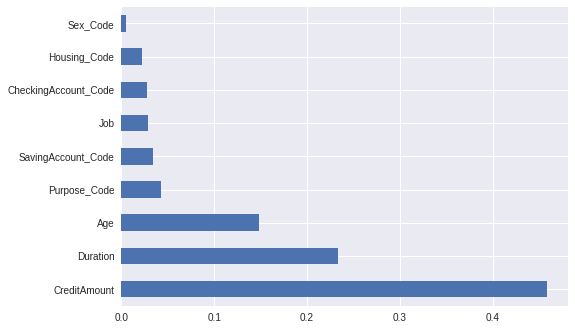

In [46]:
import pandas as pd
import numpy as np

model = GradientBoostingClassifier()
model.fit(rescaledX,Y_train)
print(model.feature_importances_) # utilizar la clase incorporada feature_importances de los clasificadores basados en árboles
# trazar un gráfico de importancia de las características para una mejor visualización
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<a id='6.3'></a>
## 7.3. Guardar el modelo para su uso posterior

In [47]:
# Salvar el modelo usando Pickle
from pickle import dump
from pickle import load

# guardar el modelo en el disco
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [48]:
# algún tiempo después...
# cargar el modelo desde el disco
loaded_model = load(open(filename, 'rb'))

# estimar la precisión en el conjunto de validación
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
result = accuracy_score(Y_validation, predictions)
print(result)

0.7047619047619048
